In [39]:
import numpy as np
import os
import PIL
import pathlib
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Conv2D,Rescaling,Flatten
import tensorflow as tf
import glob

In [4]:
data_dir = pathlib.Path('flowers_photo/').with_suffix('')
data_dir

WindowsPath('flowers_photo')

In [6]:
data_dir2=os.path.join("flowers_photo/")
data_dir2

'flowers_photo/'

In [8]:
images_count = len(list(data_dir.glob('*\\*.jpg')))
images_count

400

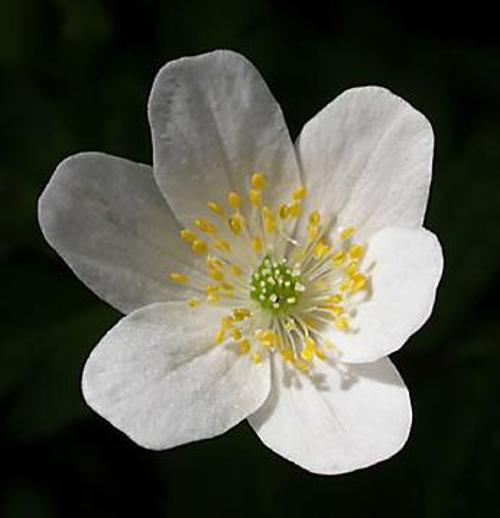

In [9]:
Bluebell  = list(data_dir.glob('Bluebell/*'))
PIL.Image.open(str(Bluebell[0]))

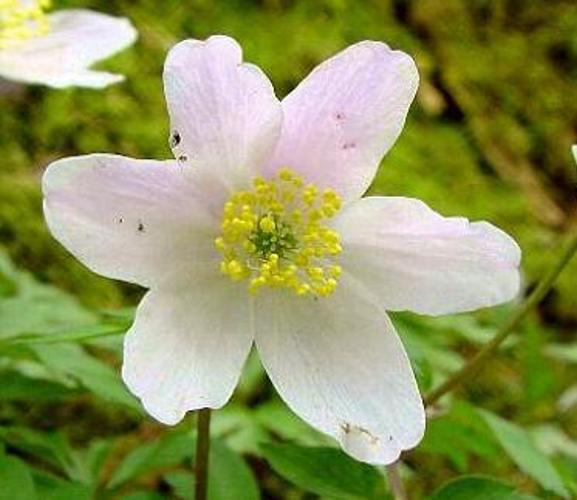

In [10]:
Bluebell  = list(data_dir.glob('Bluebell/*'))
PIL.Image.open(str(Bluebell[3]))

In [11]:
batch_size= 32
img_height = 128
img_width=128

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset='training',
    validation_split=0.2,
    seed=123,
    image_size= (img_height,img_width),
    batch_size = batch_size
)

Found 400 files belonging to 5 classes.
Using 320 files for training.


In [17]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset='validation',
    validation_split=0.2,
    seed=123,
    image_size= (img_height,img_width),
    batch_size = batch_size
)

Found 400 files belonging to 5 classes.
Using 80 files for validation.


In [25]:
classnames = train_ds.class_names

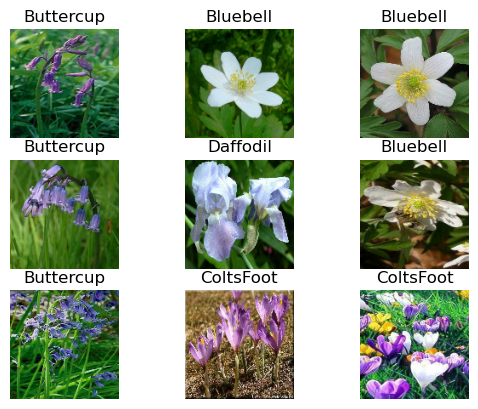

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classnames[labels[i]])
        plt.axis('off')

In [27]:
for images,labels in train_ds.take(1):
    print(labels)

tf.Tensor([0 3 3 0 4 4 3 3 2 2 3 3 4 1 0 1 4 0 2 1 3 1 2 4 4 3 1 4 4 3 3 3], shape=(32,), dtype=int32)


In [28]:
for images_batch,lables_batch in train_ds:
    print(images_batch.shape)
    print(lables_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [29]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [32]:
normalization = train_ds.map(lambda x,y:(normalization_layer(x),y))
for images,lables in normalization.take(1):
    print(images[0])

tf.Tensor(
[[[0.09414829 0.08881741 0.05922182]
  [0.09647672 0.09114584 0.06155025]
  [0.07909151 0.07376063 0.04416504]
  ...
  [0.0930621  0.07774348 0.05991259]
  [0.10588236 0.07058824 0.0509804 ]
  [0.11532199 0.08002786 0.06042002]]

 [[0.09984682 0.08526348 0.05922182]
  [0.1009804  0.08639707 0.0603554 ]
  [0.07784927 0.06326593 0.03722427]
  ...
  [0.09229904 0.06846326 0.0541863 ]
  [0.11099878 0.07570466 0.05609682]
  [0.12131348 0.08601937 0.06641152]]

 [[0.10404412 0.08235294 0.05882353]
  [0.10012256 0.07843138 0.05490196]
  [0.08636643 0.06467525 0.04114584]
  ...
  [0.09375814 0.06030226 0.04957922]
  [0.10500489 0.06971077 0.05010293]
  [0.1290135  0.09371937 0.07411152]]

 ...

 [[0.29990235 0.25039542 0.11255553]
  [0.11543018 0.08829418 0.03281011]
  [0.08124378 0.10643383 0.15198329]
  ...
  [0.6875776  0.6766401  0.57576406]
  [0.50925726 0.46042147 0.44280505]
  [0.53967816 0.40358457 0.30425858]]

 [[0.48799023 0.3577819  0.22665443]
  [0.23824202 0.15181431 0

In [35]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [40]:
num_classes = len(classnames)
model = Sequential([
    Rescaling(1./255),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(num_classes,activation='softmax')
])

In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [43]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
10/10 [==============================] - 3s 324ms/step - loss: 0.8488 - accuracy: 0.7219 - val_loss: 0.9527 - val_accuracy: 0.5875
Epoch 2/20
10/10 [==============================] - 3s 328ms/step - loss: 0.6602 - accuracy: 0.8031 - val_loss: 0.7532 - val_accuracy: 0.7125
Epoch 3/20
10/10 [==============================] - 3s 334ms/step - loss: 0.5056 - accuracy: 0.8438 - val_loss: 0.6517 - val_accuracy: 0.7375
Epoch 4/20
10/10 [==============================] - 3s 349ms/step - loss: 0.3699 - accuracy: 0.8750 - val_loss: 0.5815 - val_accuracy: 0.7500
Epoch 5/20
10/10 [==============================] - 3s 346ms/step - loss: 0.2914 - accuracy: 0.9000 - val_loss: 0.7881 - val_accuracy: 0.7125
Epoch 6/20
10/10 [==============================] - 3s 353ms/step - loss: 0.3535 - accuracy: 0.8687 - val_loss: 0.7062 - val_accuracy: 0.7625
Epoch 7/20
10/10 [==============================] - 4s 357ms/step - loss: 0.3191 - accuracy: 0.8938 - val_loss: 0.6493 - val_accuracy: 0.7750
Epoch 

In [46]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*\\*'),shuffle=False)
list_ds = list_ds.shuffle(images_count,reshuffle_each_iteration=False)

In [47]:
for f in list_ds.take(5):
    print(f)

tf.Tensor(b'flowers_photo\\Buttercup\\10.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers_photo\\Daffodil\\42.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers_photo\\Bluebell\\67.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers_photo\\Daffodil\\74.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers_photo\\Crocus\\53.jpg', shape=(), dtype=string)


In [50]:
classname_l = list(item.name for item in data_dir.glob('*'))

In [51]:
classname_l

['Bluebell', 'Buttercup', 'ColtsFoot', 'Crocus', 'Daffodil']

In [52]:
val_Size = int(images_count*0.2)
train_l = list_ds.skip(val_Size)
val_l = list_ds.take(val_Size)